In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics

C:\Users\bikas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'data\\train'
test_dir ='data\\test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=8
)

Found 4651 images belonging to 7 classes.
Found 247 images belonging to 7 classes.


# Try using pretrined model

In [3]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                 include_top=True,
                 input_shape=(224, 224, 3))

# conv_base.summary()

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Dense(7, activation='softmax'))
model.summary()

conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=10, 
                              validation_data=validation_generator, 
                              validation_steps=31)

This is the number of trainable weights before freezing the conv base: 46
Epoch 1/200
146/146 [==============================] - 50s 345ms/step - loss: 0.2212 - categorical_accuracy: 0.9476 - val_loss: 1.7312 - val_categorical_accuracy: 0.5668
Epoch 2/200
146/146 [==============================] - 37s 252ms/step - loss: 0.3616 - categorical_accuracy: 0.9048 - val_loss: 1.3743 - val_categorical_accuracy: 0.6478
Epoch 3/200
146/146 [==============================] - 35s 239ms/step - loss: 0.2768 - categorical_accuracy: 0.9290 - val_loss: 1.3837 - val_categorical_accuracy: 0.6842
Epoch 4/200
146/146 [==============================] - 36s 249ms/step - loss: 0.2376 - categorical_accuracy: 0.9384 - val_loss: 1.2385 - val_categorical_accuracy: 0.6518
Epoch 5/200
146/146 [==============================] - 37s 250ms/step - loss: 0.2079 - categorical_accuracy: 0.9431 - val_loss: 1.3553 - val_categorical_accuracy: 0.6518
Epoch 6/200
146/146 [==============================] - 35s 242ms/step - loss

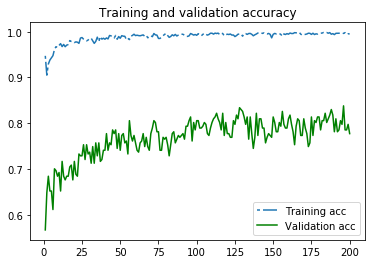

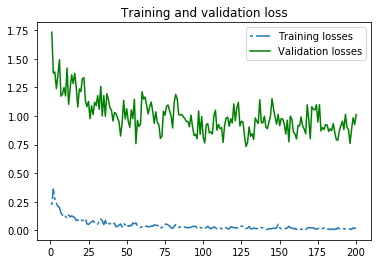

In [11]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_260': # conv2d_260 
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
model.compile(
    optimizer=optimizers.Adam(lr=5e-4, decay=5e-4/100), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=31)

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
conv_base.trainable = True
        
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))


model.compile(
    optimizer=optimizers.Adam(lr=1e-3, decay=1e-3/100), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=31)

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This is the number of trainable weights before freezing the conv base: 194
188
Epoch 1/100
146/146 [==============================] - 78s 532ms/step - loss: 1.9963 - categorical_accuracy: 0.2397 - val_loss: 2.4853 - val_categorical_accuracy: 0.1619
Epoch 2/100
146/146 [==============================] - 57s 389ms/step - loss: 1.1174 - categorical_accuracy: 0.5839 - val_loss: 2.0253 - val_categorical_accuracy: 0.1619
Epoch 3/100
146/146 [==============================] - 57s 388ms/step - loss: 0.6979 - categorical_accuracy: 0.7475 - val_loss: 1.9475 - val_categorical_accuracy: 0.1619
Epoch 4/100
146/146 [==============================] - 57s 389ms/step - loss: 0.5466 - categorical_accuracy: 0.8038 - val_loss: 1.9664 - val_categorical_accuracy: 0.1538
Epoch 5/100
146/146 [==============================] - 57s 391ms/step - loss: 0.5673 - categorical_accuracy: 0.8181 - val_loss: 4.9436 - val_categorical_accuracy: 0.1538
Epoch 6/100
146/146 [==============================] - 58s 396ms/step -

KeyboardInterrupt: 